In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [2]:
gas_data_df = pd.read_csv("Resources/Zip Code Data All.csv")
gas_data_df.head()

,Unnamed: 0,zip code,lat,lng,city,population,density,Regular avg,Midgrade avg,Premium avg,Household Income Median
0,0,92014,32.96797,-117.24879,Del Mar,12823.0,785.2,6.193333,6.393333,6.586667,155531
1,1,92025,33.08492,-117.02967,Escondido,50831.0,877.2,5.966667,6.178889,6.327778,58273
2,2,92027,33.13263,-116.98335,Escondido,56878.0,368.0,6.500000,6.700000,6.800000,65989
3,3,92037,32.85257,-117.25104,La Jolla,37505.0,1202.1,6.330000,6.550000,6.680000,109194
4,4,92071,32.85045,-116.99479,Santee,59826.0,1225.5,6.180000,6.402857,6.624286,87334


### 2. Correlation between gas type (reg, mid, super) and Zip Code
Exploring to see if the Zip Code changes the difference between the gas prices.

In [3]:
def linear_regression(x_values,y_values, clr):
    corr = round(st.pearsonr(x_values,y_values)[0],2)
    print(f"The r-squared is : {corr}")
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    line_eq = "y = " + str("{:.2e}".format(slope)) + "x + " + str(round(intercept,2))
    #plt.scatter(x_values,y_values, color = clr)
    plt.plot(x_values,regress_values,color = clr)
    
    return line_eq

The r-squared is : 0.17
The r-squared is : 0.19
The r-squared is : 0.2


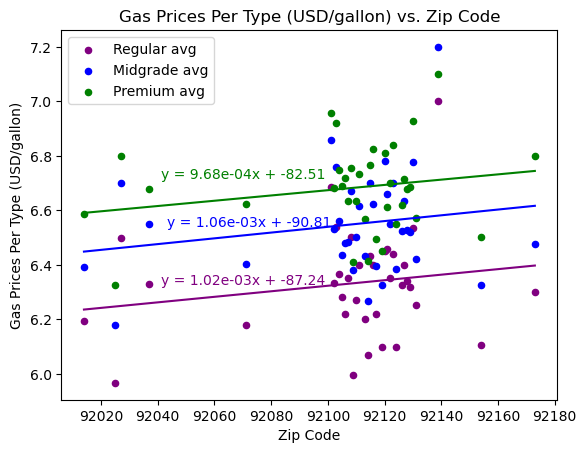

In [4]:
ax = gas_data_df.plot(x = "zip code", y = "Regular avg", kind= "scatter", label = "Regular avg", color = "purple")
gas_data_df.plot(x = "zip code", y = "Midgrade avg", kind= "scatter", label = "Midgrade avg", color = "blue", ax = ax)
gas_data_df.plot(x = "zip code", y = "Premium avg", kind= "scatter", label = "Premium avg", color = "green", ax = ax)

regular = linear_regression(gas_data_df["zip code"],gas_data_df["Regular avg"], "purple")
midgrade = linear_regression(gas_data_df["zip code"],gas_data_df["Midgrade avg"], "blue")
premium = linear_regression(gas_data_df["zip code"],gas_data_df["Premium avg"], "green")

plt.figtext(0.28,0.35, regular,fontsize=10,color="purple")
plt.figtext(0.29,0.47, midgrade,fontsize=10,color="blue")
plt.figtext(0.28,0.57, premium,fontsize=10,color="green")
plt.xlabel("Zip Code")
plt.ylabel("Gas Prices Per Type (USD/gallon)")
plt.title("Gas Prices Per Type (USD/gallon) vs. Zip Code")
plt.show()

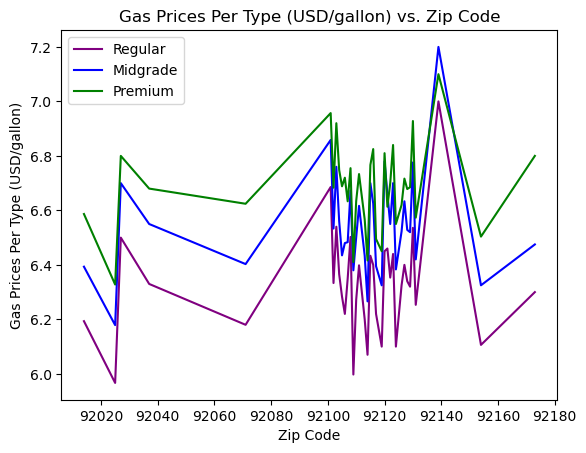

In [5]:
gas_data_df.plot(x= "zip code", y= ["Regular avg", "Midgrade avg", "Premium avg"] , kind= "line", 
                 color= ["purple", "blue", "green"],label = ["Regular", "Midgrade", "Premium"])
plt.xlabel("Zip Code")
plt.ylabel("Gas Prices Per Type (USD/gallon)")
plt.title("Gas Prices Per Type (USD/gallon) vs. Zip Code")
plt.show()

### 4. Average Gas Price vs. Zip Code

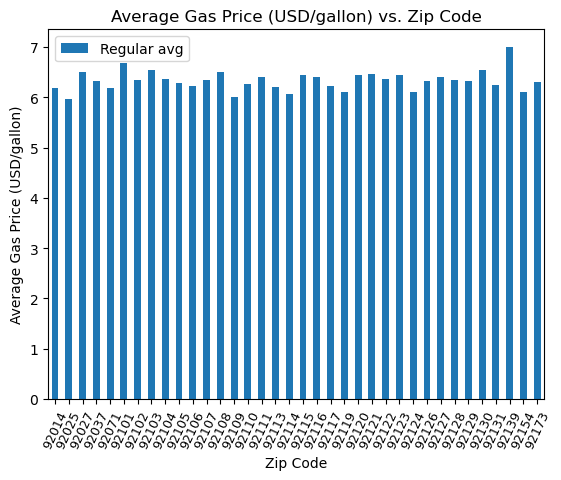

In [6]:
ax = gas_data_df.plot(x= "zip code", y= "Regular avg", rot=65, kind= "bar", width=.5)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9) 
plt.xlabel("Zip Code")
plt.ylabel("Average Gas Price (USD/gallon)")
plt.title("Average Gas Price (USD/gallon) vs. Zip Code")
plt.show()